In [1]:
import pandas as pd
import numpy as np
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
with open('../src/model_60.pkl', 'rb') as f:
    res = pickle.load(f)

In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
colnames = res['pred']['Pred'].columns

In [5]:
mae = (res['pred'].stack(level='location')
                  .groupby('location')
                  .apply(lambda s: mean_absolute_error(s['Actual'], s['Pred']))
                  .loc[colnames.str.startswith('GH')]
                  .sort_values()
                  .reset_index()
                  .rename(columns={0: 'MAE'}))

In [6]:
coef_list = [ np.abs(model.coef_.reshape(-1, colnames.size).T) for model in res['model'].estimators_ ]

In [7]:
lags = pd.DataFrame(np.dstack(coef_list).mean(axis=0).T, index=colnames)
lags = lags[lags.index.str.startswith('GH')]

In [8]:
locations = pd.DataFrame(np.dstack(coef_list).mean(axis=1).T, index=colnames, columns=colnames)
locations = locations.loc[locations.index.str.startswith('GH'), locations.columns.str.startswith('GH')]

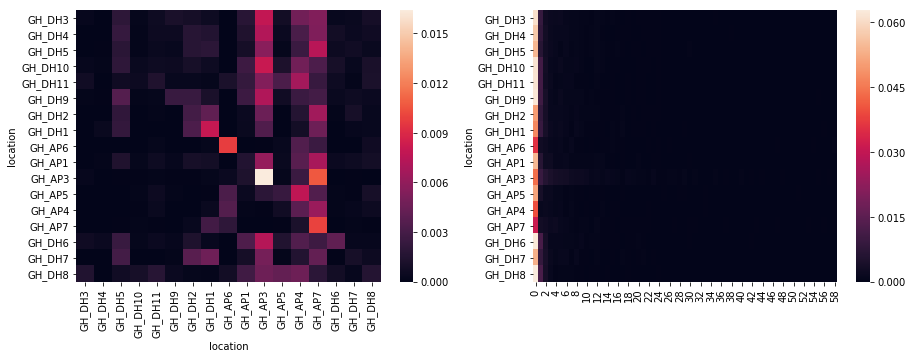

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(locations, ax=ax[0])
sns.heatmap(lags, ax=ax[1]);

In [10]:
info = pd.read_csv('/home/SHARED/SOLAR/data/info.csv')
info['location'] = info['Location'].str.replace('(HL)?_', '')

In [11]:
mae['location'] = mae['location'].str.extract('_(.*)')

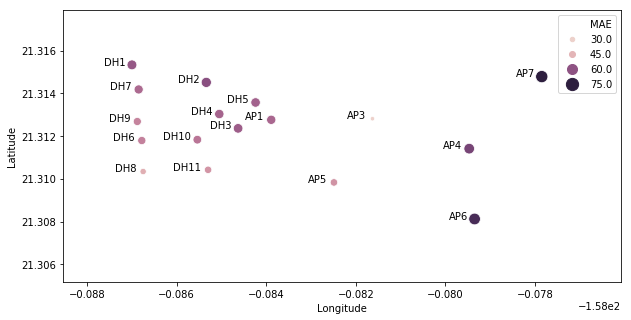

In [12]:
plt.subplots(figsize=(10, 5))
p = sns.scatterplot(x='Longitude', y='Latitude', hue='MAE', size='MAE', data=info.merge(mae), sizes=(20, 150))

for idx, row in info.iterrows():
     p.text(row['Longitude']-1.5e-4, row['Latitude'], row['location'], 
            horizontalalignment='right', size='medium', color='black')

In [13]:
for model in res['model'].estimators_:
    print(model.alpha_)

236.29845387296407
228.20621132513634
233.56121733057265
233.63028731859296
231.64040958616263
241.4351382172005
226.36081495517814
223.46949939086716
230.06836928955258
397.2546295012223
238.258898399358
229.0993078947758
184.63789964608543
231.85962724538288
422.32621935864444
429.60172277275757
237.29214023507848
231.9479629817645
236.37827441812217
